# Zadanie nr 1 - Dopasowywanie wzorca

In [45]:
from time import time
import re
import matplotlib.pyplot as plt

## 0. Implementacja algorytmów

#### algorytm naiwny

In [8]:
def naive(text, pattern):
    result = []

    pattern_length = len(pattern)
    text_length = len(text)

    for i in range(text_length - pattern_length + 1):
        if text[i:i + pattern_length] == pattern:
            result.append(i)

    return result

#### algorytm automatu skończonego

In [10]:
def finite_automaton(text, delta):
    result = []

    pattern_length = len(delta) - 1
    state = 0

    for i, char in enumerate(text):
        if char in delta[0]:
            state = delta[state][char]
            if state == pattern_length:
                result.append(i - pattern_length + 1)
        else:
            state = 0

    return result

In [13]:
def transition_table(pattern):
    result = []
    alphabet = set([c for c in pattern])

    for q in range(0, len(pattern) + 1):
        result.append({})
        for a in alphabet:
            k = min(len(pattern), q + 1)

            while True:
                if re.search(f"{pattern[:k]}$", pattern[:q] + a):
                    break
                k -= 1

            result[q][a] = k

    return result

#### algorytm KMP

In [14]:
def kmp(text, pattern, prefix_function):
    result = []
    
    pattern_length = len(pattern)
    text_length = len(text)

    pi = prefix_function
    q = 0

    for i in range(len(text)):
        while q > 0 and pattern[q] != text[i]:
            q = pi[q-1]

        if pattern[q] == text[i]:
            q += 1

        if q == len(pattern):
            result.append(i + 1 - q)
            q = pi[q-1]

    return result

In [16]:
def prefix_function(pattern):
    pi = [0]
    k = 0

    for q in range(1, len(pattern)):
        while(k > 0 and pattern[k] != pattern[q]):
            k = pi[k-1]

        if(pattern[k] == pattern[q]):
            k += 1

        pi.append(k)

    return pi

## 1. Testy czasu działania algorytmów

* Zaimplementuj testy porównujące szybkość działania (osobno czas pre-processingu oraz czas dopasowania) wyżej wymienionych algorytmów.

In [72]:
def compare_time(text, pattern):
    start = time()
    naive_result = naive(text, pattern)
    end = time()
    
    naive_time = end - start
    
    print(f'naive algorithm:\n\tpreprocessing: 0s\n\tmatching: {naive_time}s')
      
    preprocessing_start = time()
    delta = transition_table(pattern)
    preprocessing_end = time()
    
    automaton_pre_time = preprocessing_end - preprocessing_start
    
    start = time()
    automaton_result = finite_automaton(text, delta)
    end = time()
    automaton_time = end - start
    
    print(f'finite automaton algorithm:\n\tpreprocessing: {automaton_pre_time}s\n\tmatching: {automaton_time}s')
        
    preprocessing_start = time()
    prefix_func = prefix_function(pattern)
    preprocessing_end = time()
    kmp_pre_time = preprocessing_end - preprocessing_start
          
    start = time()
    kmp_result = kmp(text, pattern, prefix_func)
    end = time()
    kmp_time = end - start
    
    print(f'kmp algorithm:\n\tpreprocessing: {kmp_pre_time}s\n\tmatching: {kmp_time}s')
    
    fig, ax = plt.subplots()
    x_axis = ["naive", "automaton", "kmp"]

    preprocessing_times = [0, automaton_pre_time, kmp_pre_time]
    ax.bar(x_axis, preprocessing_times)
    
    matching_times = [naive_time, automaton_time, kmp_time]
    ax.bar(x_axis, matching_times, bottom=preprocessing_times)
    
    ax.legend(labels=["preprocessing", "matching"])
    plt.show()

naive algorithm:
	preprocessing: 0s
	matching: 8.58306884765625e-06s
finite automaton algorithm:
	preprocessing: 7.963180541992188e-05s
	matching: 8.58306884765625e-06s
kmp algorithm:
	preprocessing: 4.5299530029296875e-06s
	matching: 9.059906005859375e-06s


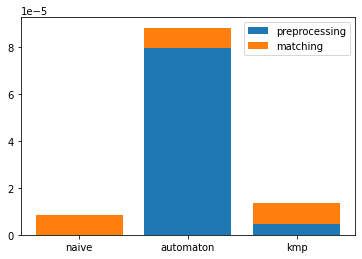

In [73]:
compare_time("abcabcabbabc", "abc")

## 2. Przykład działania programu - wyszukanie wzorca "art" w ustawie

* Znajdź wszystkie wystąpienia wzorca "art" w załączonej ustawie, za pomocą każdego algorytmu.

In [108]:
with open("ustawa.txt", "r") as file:
    text = "".join(file)
    
print(len(naive(text, "art")))
print(len(finite_automaton(text, transition_table("art"))))
print(len(kmp(text, "art", prefix_function("art"))))

273
273
273


## 3. Porównanie czasu działania algorytmów w punkcie 2.

* Porównaj szybkość działania algorytmów dla problemu z p. 2.

naive algorithm:
	preprocessing: 0s
	matching: 0.04301261901855469s
finite automaton algorithm:
	preprocessing: 4.982948303222656e-05s
	matching: 0.015055179595947266s
kmp algorithm:
	preprocessing: 5.4836273193359375e-06s
	matching: 0.023117542266845703s


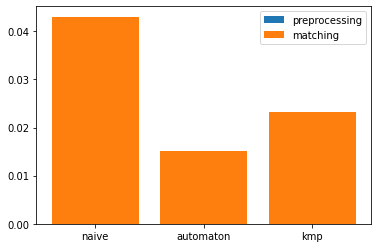

In [82]:
compare_time(text, "art")

## 4. Niekorzystność algorytmu naiwnego - przykład

* Zaproponuj tekst oraz wzorzec, dla którego zmierzony czas działania algorytmów (uwzględniający tylko dopasowanie, bez pre-processingu) automatu skończonego oraz KMP będzie co najmniej 5-krotnie krótszy niż dla algorytmu naiwnego.

In [105]:
#TODO

## 5. Czasy preprocessingu - przykład

* Zaproponuj wzorzec, dla którego zmierzony czas obliczenia tablicy przejścia automatu skończonego będzie co najmniej 5-krotnie dłuższy, niż czas potrzebny na utworzenie funkcji przejścia w algorytmie KMP.

naive algorithm:
	preprocessing: 0s
	matching: 9.298324584960938e-06s
finite automaton algorithm:
	preprocessing: 1.4537067413330078s
	matching: 1.1682510375976562e-05s
kmp algorithm:
	preprocessing: 6.246566772460938e-05s
	matching: 5.245208740234375e-06s


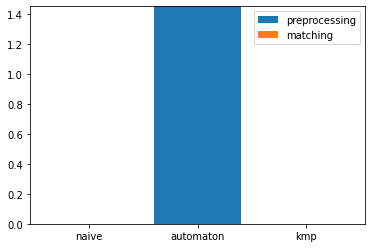

In [106]:
compare_time("a", "abcdefghijklmnopqrstuvwxyz"*10)

## 6. Wnioski

'abab'

Marcin Hawryluk, 19.03.2020